
#Lopez Chavez Pablo


Leer de google drive

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Librerias

In [78]:
import os

# Cálculo científico y vectorial para python
import numpy as np

# Libreria para graficos
from matplotlib import pyplot

# Modulo de optimizacion en scipy
from scipy import optimize
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from scipy.optimize import fmin_tnc

# modulo para cargar archivos en formato MATLAB
# from scipy.io import loadmat

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

Leemos el data set y Codificar la columna 'Gender' usando LabelEncoder, Ajusta el codificador a la columna 'Gender' y luego la transforma,
reemplazando los valores categóricos (como 'Male' y 'Female') por valores numéricos (por ejemplo, 'Male' puede ser 1 y 'Female' puede ser 0), Codificar la columna 'Customer Type' usando LabelEncoder
Se aplica el mismo procedimiento a la columna 'Customer Type'. Si la columna tiene valores como 'Loyal Customer' y 'Disloyal Customer',
estos se convertirán en números, por ejemplo, 0 y 1.
Codificar la columna 'Type of Travel' usando LabelEncoder
valores numericos, Convertir 'satisfaction' a 1 para 'satisfied' y 0 para 'neutral or dissatisfaction',  Reorganizar las columnas para poner 'Class' al final, Guardar el dataset preprocesado en un nuevo archivo CSV, usando drive

In [79]:
#Cargar desde computadora
#data = np.genfromtxt('test.csv', delimiter=',')

data = pd.read_csv('/content/drive/Othercomputers/Mi portátil/6to Semetre Original/IA/labs/Lab4/test.csv')
data.drop('#', axis=1, inplace=True)

# Codificar la columna 'Gender' usando LabelEncoder
# Ajusta el codificador a la columna 'Gender' y luego la transforma,
#reemplazando los valores categóricos (como 'Male' y 'Female') por valores numéricos (por ejemplo, 'Male' puede ser 1 y 'Female' puede ser 0).
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Codificar la columna 'Customer Type' usando LabelEncoder
#Se aplica el mismo procedimiento a la columna 'Customer Type'. Si la columna tiene valores como 'Loyal Customer' y 'Disloyal Customer',
#estos se convertirán en números, por ejemplo, 0 y 1.
data['Customer Type'] = label_encoder.fit_transform(data['Customer Type'])

# Codificar la columna 'Type of Travel' usando LabelEncoder
#valores numericos
data['Type of Travel'] = label_encoder.fit_transform(data['Type of Travel'])

# Convertir 'satisfaction' a 1 para 'satisfied' y 0 para 'neutral or dissatisfaction'
data['satisfaction'] = (data['satisfaction'] == 'satisfied').astype(int)

# Reorganizar las columnas para poner 'Class' al final
class_col = data.pop('Class')
data['Class'] = class_col

# Guardar el dataset preprocesado en un nuevo archivo CSV
#data.to_csv('dataset_preprocesado_numerico.csv', index=False)

#usando drive
file_path = '/content/drive/Othercomputers/Mi portátil/6to Semetre Original/IA/labs/Lab4/dataset_preprocesado_numerico.csv'
data.to_csv(file_path, index=False)
#usando computadora
#data.to_csv('dataset_preprocesado_numerico.csv', index=False)


Cargamos de nuevo Eliminar la primera fila que contiene los encabezados de las columnas, Convertir la columna 'Class' en valores numéricos, Eliminar las filas que contienen valores faltantes, Convertir el DataFrame a una matriz NumPy si es necesario,

In [80]:
# Cargar el dataset usando Pandas
data = pd.read_csv('/content/drive/Othercomputers/Mi portátil/6to Semetre Original/IA/labs/Lab4/dataset_preprocesado_numerico.csv')

# Eliminar la primera fila que contiene los encabezados de las columnas
data = data.iloc[1:]

# Convertir la columna 'Class' en valores numéricos
class_mapping = {'Business': 1, 'Eco': 2, 'Eco Plus': 3}
data['Class'] = data['Class'].map(class_mapping)

# Eliminar las filas que contienen valores faltantes
data.dropna(inplace=True)

# Convertir el DataFrame a una matriz NumPy si es necesario
data_np = data.to_numpy()
# Imprimir el primer valor de cada columna
for column in data.columns:
    print(f"Primer valor en la columna '{column}': {data[column].iloc[0]}")


Primer valor en la columna 'id': 90035
Primer valor en la columna 'Gender': 0
Primer valor en la columna 'Customer Type': 0
Primer valor en la columna 'Age': 36
Primer valor en la columna 'Type of Travel': 0
Primer valor en la columna 'Flight Distance': 2863
Primer valor en la columna 'Inflight wifi service': 1
Primer valor en la columna 'Departure/Arrival time convenient': 1
Primer valor en la columna 'Ease of Online booking': 3
Primer valor en la columna 'Gate location': 1
Primer valor en la columna 'Food and drink': 5
Primer valor en la columna 'Online boarding': 4
Primer valor en la columna 'Seat comfort': 5
Primer valor en la columna 'Inflight entertainment': 4
Primer valor en la columna 'On-board service': 4
Primer valor en la columna 'Leg room service': 4
Primer valor en la columna 'Baggage handling': 4
Primer valor en la columna 'Checkin service': 3
Primer valor en la columna 'Inflight service': 4
Primer valor en la columna 'Cleanliness': 5
Primer valor en la columna 'Departure

La entrada es de 23 elemento contando con x0, 3 etiquetas (1, 2 o 3), los datos de entrenamiento el 80% para x desde las 0 hasta las 20714 Todas menos la ultima para y solo la ultima, desde las 20714 hasta..

In [81]:
# La entrada es de 23 elemento contando con x0
input_layer_size  = 23

# 3 etiquetas (1, 2 o 3)
num_labels = 3
#desde las 0 hasta las 20714 Todas menos la ultima
X = data_np[:20780, :-1]
#solo la
y = data_np[:20780, -1]
#desde las 20714 hasta..
X_test = data_np[20780:, :-1]
Y_test = data_np[20780:, -1]

m = y.size

In [82]:
print(X.shape)
print(y.shape)
print(X_test.shape)
print(Y_test.shape)

(20780, 23)
(20780,)
(5112, 23)
(5112,)


Normalizamos los datos

In [83]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [84]:
print(X.shape)
print(y.shape)
print(X_test.shape)
print(Y_test.shape)

(20780, 23)
(20780,)
(5112, 23)
(5112,)


Se llama a la funcion para normalizar los datos

In [85]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)
X_test_norm, mu_test,sigma_test = featureNormalize(X_test)

Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.

In [86]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
X = X_norm


In [87]:
print(X.shape)
print(y.shape)
print(X_test.shape)
print(Y_test.shape)

(20780, 23)
(20780,)
(5112, 23)
(5112,)


In [88]:
# Selecciona aleatoriamente 100 puntos de datos para mostrar
rand_indices = np.random.choice(m, 100, replace=False)
sel = X[rand_indices, :]
print(sel.shape)

(100, 23)


la funcion que nos ayuda a transformar cualquier valor entre 0 y 1 para modelar probabilidades, ya que la salida puede interpretarse como una probabilidad.

In [89]:
def sigmoid(z):
    """
    Calcula la sigmoide de z.
    """
    return 1.0 / (1.0 + np.exp(-z))

algoritmo de optimización para ajustar los parámetros de un modelo de regresión logística durante el entrenamiento. Ayuda a encontrar los valores óptimos de los parámetros que minimizan el costo total, teniendo en cuenta la regularización para evitar sobreajuste

In [90]:
def lrCostFunction(theta, X, y, lambda_):
    """
    Calcula el costo de usar theta como parámetro para la regresión logística regularizada y
    el gradiente del costo w.r.t. a los parámetros.

    Parametros
    ----------
    theta : array_like
        Parametro theta de la regresion logistica. Vector de la forma(shape) (n, ). n es el numero de caracteristicas
        incluida la intercepcion

    X : array_like
        Dataset con la forma(shape) (m x n). m es el numero de ejemplos, y n es el numero de
        caracteristicas (incluida la intercepcion).

    y : array_like
        El conjunto de etiquetas. Un vector con la forma (shape) (m, ). m es el numero de ejemplos

    lambda_ : float
        Parametro de regularización.

    Devuelve
    -------
    J : float
        El valor calculado para la funcion de costo regularizada.

    grad : array_like
        Un vector de la forma (shape) (n, ) que es el gradiente de la
        función de costo con respecto a theta, en los valores actuales de theta..
    """

    # Inicializa algunos valores utiles
    m = y.size

    # convierte las etiquetas a valores enteros si son boleanos
    if y.dtype == bool:
        y = y.astype(int)

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    temp = theta
    temp[0] = 0

#     J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
    #
    grad = (1 / m) * (h - y).dot(X)
#     theta = theta - (alpha / m) * (h - y).dot(X)
    grad = grad + (lambda_ / m) * temp

    return J, grad
#    return J, theta

572 tethas

In [91]:
def oneVsAll(X, y, num_labels, lambda_):
    """
    Trains num_labels logistic regression classifiers and returns
    each of these classifiers in a matrix all_theta, where the i-th
    row of all_theta corresponds to the classifier for label i.

    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n). m is the number of
        data points, and n is the number of features. Note that we
        do not assume that the intercept term (or bias) is in X, however
        we provide the code below to add the bias term to X.

    y : array_like
        The data labels. A vector of shape (m, ).

    num_labels : int
        Number of possible labels.

    lambda_ : float
        The logistic regularization parameter.

    Returns
    -------
    all_theta : array_like
        The trained parameters for logistic regression for each class.
        This is a matrix of shape (K x n+1) where K is number of classes
        (ie. `numlabels`) and n is number of features without the bias.
    """
    # algunas variables utiles
    m, n = X.shape

    all_theta = np.zeros((num_labels, n + 1))

    # Agrega unos a la matriz X
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    for c in np.arange(num_labels):
        initial_theta = np.zeros(n + 1)
        options = {'maxiter': 50}
        res = optimize.minimize(lrCostFunction,
                                initial_theta,
                                (X, (y == c), lambda_),
                                jac=True,
                                method='CG',
                                options=options)

        all_theta[c] = res.x

    return all_theta

In [92]:
print(X.shape)
print(y.shape)
print(X_test.shape)
print(Y_test.shape)

(20780, 23)
(20780,)
(5112, 23)
(5112,)


In [93]:
lambda_ = 0.1
all_theta = oneVsAll(X, y, num_labels, lambda_)
print(all_theta.shape)

(3, 24)


In [94]:
print(all_theta)

[[-1.24380805e+01  8.02973349e-13 -7.12419144e-14 -1.62290569e-12
   1.48954533e-12 -3.07857279e-12  3.05937029e-12  4.18365578e-12
   1.02716897e-12  2.86927954e-12  7.28706423e-13  5.51397286e-12
   5.92915092e-12  6.59372087e-12  7.97060259e-12  5.27108871e-12
   4.45635416e-12  4.81051832e-12  3.44766819e-12  4.84988091e-12
   6.56056663e-12 -7.17675800e-13 -8.00860710e-13  6.77047999e-12]
 [-4.42239360e-02  2.14551581e-01  3.83343831e-02 -2.43670825e-01
   1.60468570e-01 -1.59140283e+00  1.08053835e+00 -8.31505416e-01
  -5.45186632e-03  2.66071218e-01  6.88359072e-02  7.29903887e-02
   5.84822022e-01  2.60566359e-01 -2.96267347e-01  2.86222797e-01
   1.32097154e-01  2.90071319e-01  1.94284499e-01  2.28883602e-01
  -5.52166060e-02 -5.43429260e-02  2.80590344e-02  3.79115150e-01]
 [-5.11146271e-01 -1.56304678e-01 -1.78041411e-03  4.09791203e-01
  -9.18924988e-02  1.14091215e+00 -7.69924169e-01  5.99379684e-01
   3.98464946e-02 -2.13406695e-01 -4.93509454e-02 -4.94174322e-02
  -3.799

predicciones en un problema de clasificación multiclase
realiza el producto punto entre X y la transpuesta de all_theta. all_theta tiene forma (num_labels, n + 1), donde n es el número de características en X más 1 para el sesgo

In [95]:
def predictOneVsAll(all_theta, X):

    m = X.shape[0];
    num_labels = all_theta.shape[0]

    p = np.zeros(m)

    # Add ones to the X data matrix
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis = 1)

    return p

In [96]:
print(X.shape)
pred = predictOneVsAll(all_theta, X)
print(X.shape)
print('Precision del conjuto de entrenamiento: {:.2f}%'.format(np.mean(pred == y) * 100))
XPrueba = X[10:150, :].copy()
print(XPrueba.shape)

XPrueba = np.concatenate([np.ones((140, 1)), XPrueba], axis=1)
print(XPrueba.shape)
p = np.argmax(sigmoid(XPrueba.dot(all_theta.T)), axis = 1)
print(p)

print(y[10:150])

(20780, 23)
(20780, 23)
Precision del conjuto de entrenamiento: 77.86%
(140, 23)
(140, 24)
[1 1 1 1 2 1 2 2 1 1 2 2 1 2 2 1 2 1 2 2 1 2 2 2 2 1 1 1 2 2 2 2 1 2 2 1 2
 1 2 2 1 1 1 1 2 1 2 2 2 1 1 2 2 1 2 1 2 1 1 2 1 2 1 2 2 1 2 2 2 1 2 1 1 2
 2 2 1 2 1 1 2 1 1 1 2 2 1 2 1 2 2 2 2 1 1 1 2 2 1 1 2 1 2 2 2 2 1 2 1 1 1
 2 2 2 2 2 2 1 1 2 2 2 2 1 2 1 1 2 1 1 1 2 1 1 1 1 1 2 2 1]
[1. 1. 1. 1. 2. 2. 3. 2. 1. 1. 2. 2. 1. 2. 2. 1. 2. 1. 2. 1. 2. 2. 2. 2.
 2. 1. 1. 1. 2. 1. 2. 1. 1. 3. 2. 1. 2. 1. 2. 3. 1. 2. 2. 1. 1. 1. 2. 2.
 2. 1. 2. 2. 2. 1. 3. 1. 2. 1. 1. 1. 1. 1. 1. 3. 2. 2. 2. 3. 2. 1. 2. 1.
 1. 2. 1. 2. 1. 2. 2. 1. 2. 1. 2. 1. 3. 2. 1. 2. 1. 2. 2. 2. 2. 1. 1. 1.
 2. 2. 1. 2. 2. 1. 2. 3. 2. 2. 1. 2. 1. 3. 1. 2. 1. 2. 2. 2. 1. 1. 1. 2.
 3. 2. 1. 1. 3. 1. 1. 2. 1. 2. 1. 2. 1. 1. 1. 2. 1. 2. 2. 1.]


Para la grafica

In [97]:
def plot_cost_function(X, y, theta, lambda_):
    """
    Calcula el costo de usar theta como parámetro para la regresión logística regularizada.
    """
    J, _ = lrCostFunction(theta, X, y, lambda_)
    return J


Tamaño de theta_for_class: (24,)
Tamaño de X_norm: (20780, 23)
Número de ejemplos: 20780
Número de características: 23


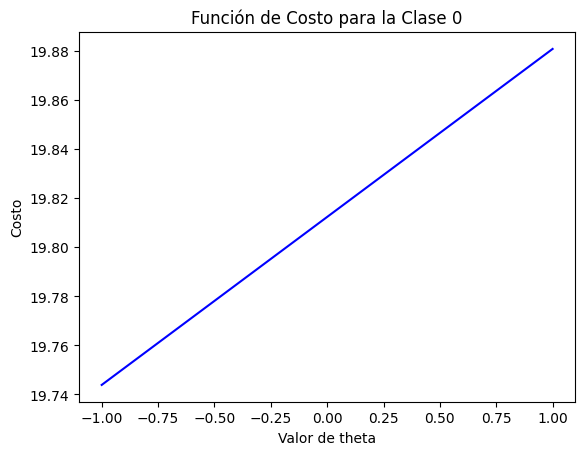

In [98]:
theta_for_class = all_theta[0]
print("Tamaño de theta_for_class:", theta_for_class.shape)
print("Tamaño de X_norm:", X_norm.shape)
print("Número de ejemplos:", y.shape[0])
print("Número de características:", X_norm.shape[1])
cost_values = []
theta_values = np.linspace(-1, 1, 100)
for t in theta_values:
    theta_test = np.copy(theta_for_class)
    theta_test[1] = t
    X_with_intercept = np.concatenate([np.ones((X_norm.shape[0], 1)), X_norm], axis=1)
    cost = plot_cost_function(X_with_intercept, y, theta_test, lambda_)
    cost_values.append(cost)

plt.plot(theta_values, cost_values, 'b-')
plt.xlabel('Valor de theta')
plt.ylabel('Costo')
plt.title('Función de Costo para la Clase 0')
plt.show()

Tamaño de theta_for_class: (24,)
Tamaño de X_norm: (20780, 23)
Número de ejemplos: 20780
Número de características: 23


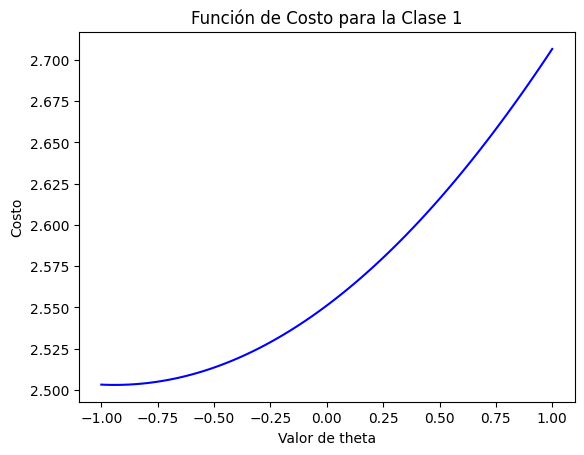

In [99]:
theta_for_class = all_theta[1]
print("Tamaño de theta_for_class:", theta_for_class.shape)
print("Tamaño de X_norm:", X_norm.shape)
print("Número de ejemplos:", y.shape[0])
print("Número de características:", X_norm.shape[1])

cost_values = []
theta_values = np.linspace(-1, 1, 100)

for t in theta_values:
    theta_test = np.copy(theta_for_class)
    theta_test[1] = t
    X_with_intercept = np.concatenate([np.ones((X_norm.shape[0], 1)), X_norm], axis=1)
    cost = plot_cost_function(X_with_intercept, y, theta_test, lambda_)
    cost_values.append(cost)

plt.plot(theta_values, cost_values, 'b-')
plt.xlabel('Valor de theta')
plt.ylabel('Costo')
plt.title('Función de Costo para la Clase 1')
plt.show()

Tamaño de theta_for_class: (24,)
Tamaño de X_norm: (20780, 23)
Número de ejemplos: 20780
Número de características: 23


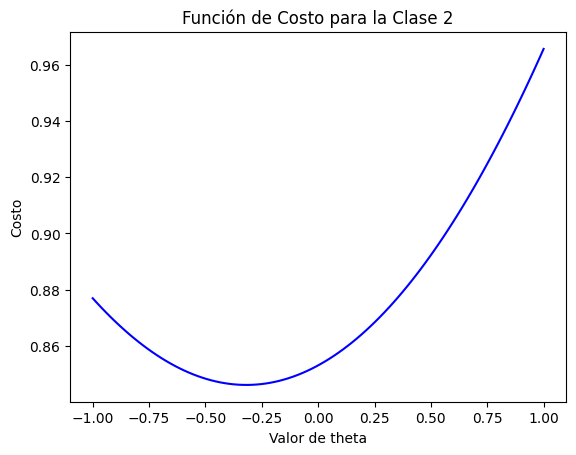

In [100]:
theta_for_class = all_theta[2]
print("Tamaño de theta_for_class:", theta_for_class.shape)
print("Tamaño de X_norm:", X_norm.shape)
print("Número de ejemplos:", y.shape[0])
print("Número de características:", X_norm.shape[1])
cost_values = []
theta_values = np.linspace(-1, 1, 100)
for t in theta_values:
    theta_test = np.copy(theta_for_class)
    theta_test[1] = t
    X_with_intercept = np.concatenate([np.ones((X_norm.shape[0], 1)), X_norm], axis=1)
    cost = plot_cost_function(X_with_intercept, y, theta_test, lambda_)
    cost_values.append(cost)
plt.plot(theta_values, cost_values, 'b-')
plt.xlabel('Valor de theta')
plt.ylabel('Costo')
plt.title('Función de Costo para la Clase 2')
plt.show()

Mostrar los resultados

In [101]:
print(X.shape)
pred = predictOneVsAll(all_theta, X)
print('Precision del conjunto de entrenamiento: {:.2f}%'.format(np.mean(pred == y) * 100))
XPrueba = X_test_norm[10:150, :].copy()
print(XPrueba.shape)
XPrueba = np.concatenate([np.ones((140, 1)), XPrueba], axis=1)
p = np.argmax(sigmoid(XPrueba.dot(all_theta.T)), axis=1)

# Imprimir la clase predicha y la clase real
correctas = 0
total = len(Y_test[10:200])
for predicha, real in zip(p, y[10:200]):
    if predicha == real:
        correctas += 1
    print("Clase predicha para el pasajero: {}, Clase real: {}".format(predicha, real))

# Calcular y mostrar la precisión
precision = correctas / total
print("Correctas: {}/{}".format(correctas, total))


(20780, 23)
Precision del conjunto de entrenamiento: 77.86%
(140, 23)
Clase predicha para el pasajero: 2, Clase real: 1.0
Clase predicha para el pasajero: 1, Clase real: 1.0
Clase predicha para el pasajero: 1, Clase real: 1.0
Clase predicha para el pasajero: 2, Clase real: 1.0
Clase predicha para el pasajero: 2, Clase real: 2.0
Clase predicha para el pasajero: 1, Clase real: 2.0
Clase predicha para el pasajero: 1, Clase real: 3.0
Clase predicha para el pasajero: 1, Clase real: 2.0
Clase predicha para el pasajero: 1, Clase real: 1.0
Clase predicha para el pasajero: 1, Clase real: 1.0
Clase predicha para el pasajero: 1, Clase real: 2.0
Clase predicha para el pasajero: 1, Clase real: 2.0
Clase predicha para el pasajero: 2, Clase real: 1.0
Clase predicha para el pasajero: 1, Clase real: 2.0
Clase predicha para el pasajero: 1, Clase real: 2.0
Clase predicha para el pasajero: 2, Clase real: 1.0
Clase predicha para el pasajero: 2, Clase real: 2.0
Clase predicha para el pasajero: 2, Clase real